In [1]:
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os
import random
import re
import cv2
from sklearn.model_selection import train_test_split

In [2]:
PATH = "./PokemonData"
file_list = []
img_list = []
def get_data(path=PATH):
    sub_dir = os.listdir(path)
    for i in sub_dir:
        curr = path+'/'+i
        if os.path.isdir(curr):
            get_data(curr)
        else:
            file_list.append(curr)
get_data()
print(len(file_list))
random.shuffle(file_list)
k = 0
for i in file_list:
    try:
        tmp_img = cv2.imread(i)
        #print(tmp_img)
        tmp_img = cv2.resize(tmp_img,(128,128))
        img_list.append(tmp_img)
    except:
        if k == 0:
            print("list of uncompatible file(s)........")
        print(i)
        k+=1
d_in = np.array(img_list)
d_in = d_in/255.0

6837
list of uncompatible file(s)........
./PokemonData/Golduck/bc08a691e7cb41b0bec2adf931dc9634.svg
./PokemonData/Tentacruel/d6fb0a3046364ea2b49525c6f6b966e5.svg
./PokemonData/Exeggutor/2b8bc491c5ca4e788999f8ea53617638.svg
./PokemonData/Omastar/1be6e7da1bba4379b298b20013c57b4b.svg
./PokemonData/Dewgong/e3ecbb47e192470aa8686734b7813b43.svg
./PokemonData/Cloyster/ff270ebfab0f46b3b05c3fecd6a15ef9.svg
./PokemonData/Zapdos/c99b2d19544c4cbbacd7711ade660279.svg
./PokemonData/Scyther/a8734f10941a4deb95fcf7388e4fe8e2.svg
./PokemonData/Venomoth/bb5d47bced6e4e33a77faa17e1eec906.svg
./PokemonData/Exeggutor/f29b4f9fccff4055b167ece6556143cd.svg
./PokemonData/Magneton/45e434d002bd44eeb1acbc2decc8ee0f.svg


In [3]:
# The encoder
img_size = 128
code_size = 256
encoder = tf.keras.Sequential()
encoder.add(tf.keras.layers.InputLayer((img_size, img_size, 3)))
encoder.add(tf.keras.layers.Conv2D(64,3,input_shape=((img_size, img_size, 3)),activation='relu'))
encoder.add(tf.keras.layers.MaxPooling2D())
encoder.add(tf.keras.layers.Conv2D(32,3,strides=(2,2),activation='relu'))
encoder.add(tf.keras.layers.MaxPooling2D((2,2)))
encoder.add(tf.keras.layers.Flatten())
encoder.add(tf.keras.layers.Dense(code_size,activation='relu'))

# The decoder
decoder = tf.keras.Sequential()
decoder.add(tf.keras.layers.InputLayer((code_size,)))
decoder.add(tf.keras.layers.Dense(img_size * img_size * 3,activation='relu'))
decoder.add(tf.keras.layers.Reshape((img_size, img_size, 3)))

inp = tf.keras.layers.Input((img_size, img_size, 3))
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = tf.keras.models.Model(inp, reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256)               1863712   
_________________________________________________________________
sequential_1 (Sequential)    (None, 128, 128, 3)       12632064  
Total params: 14,495,776
Trainable params: 14,495,776
Non-trainable params: 0
_________________________________________________________________


In [4]:
split = train_test_split(d_in, d_in, test_size=0.1, random_state=30)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

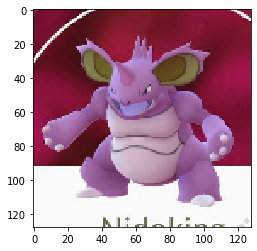

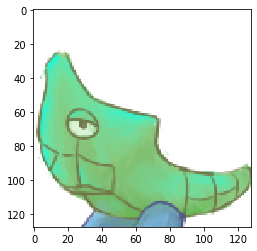

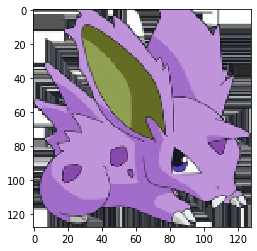

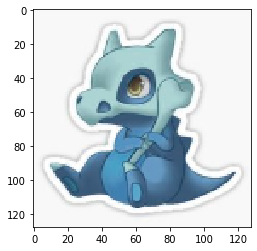

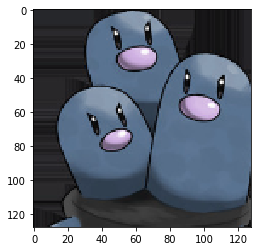

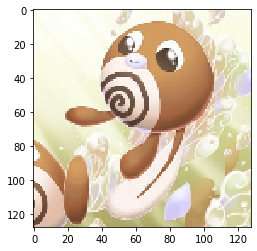

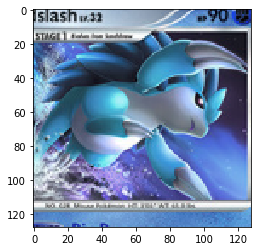

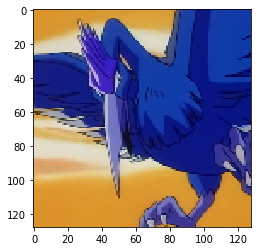

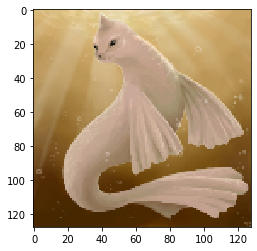

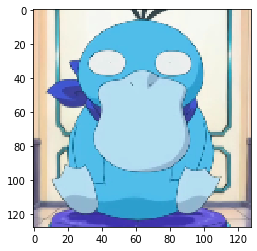

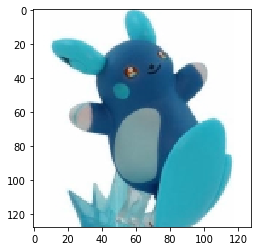

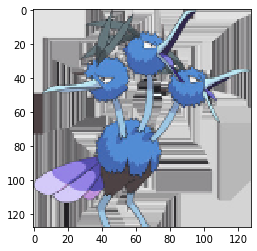

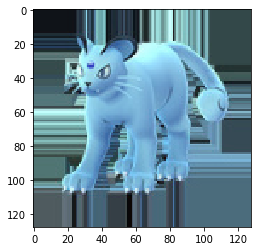

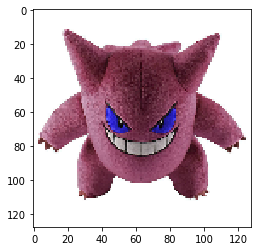

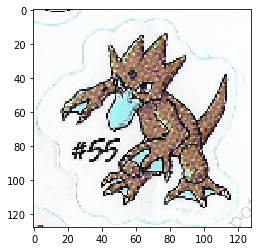

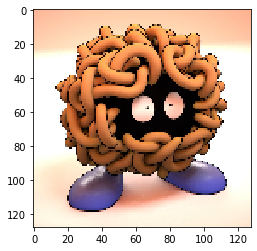

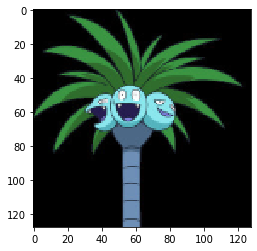

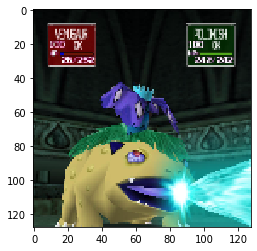

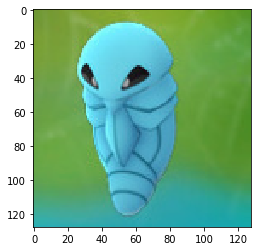

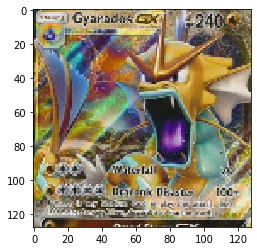

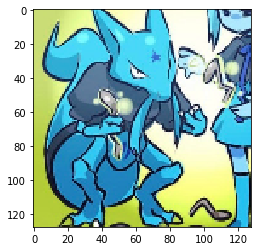

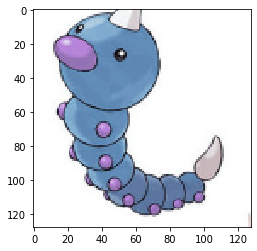

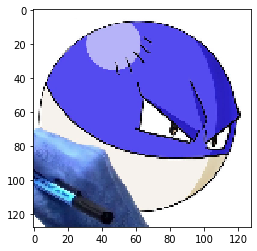

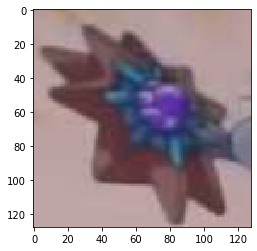

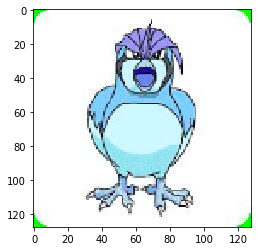

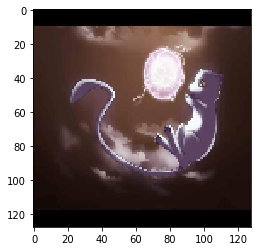

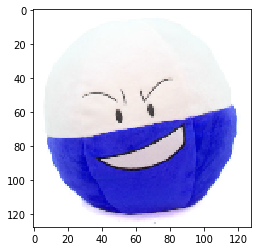

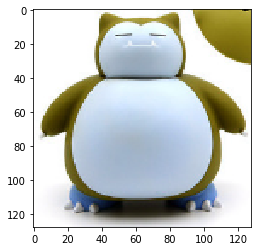

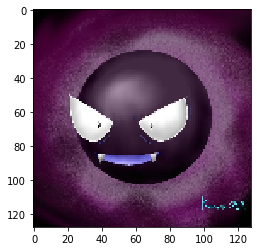

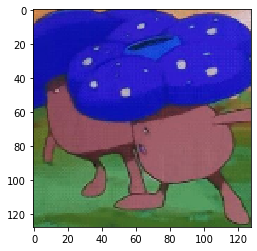

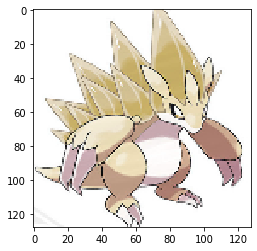

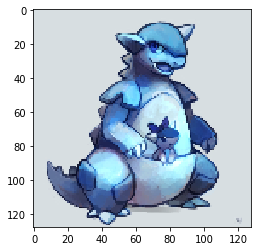

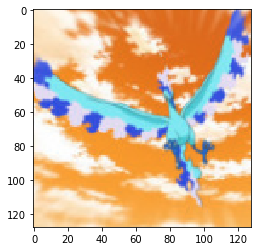

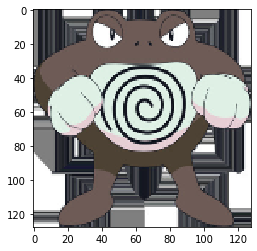

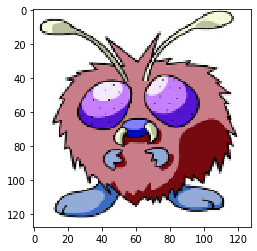

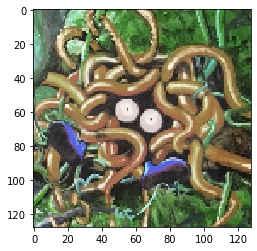

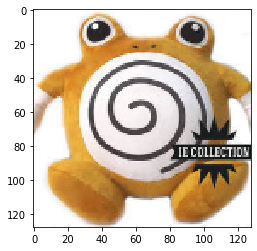

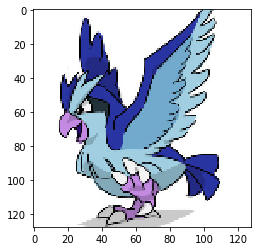

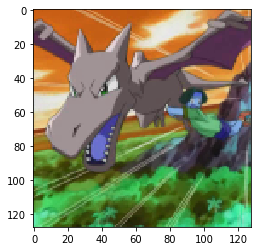

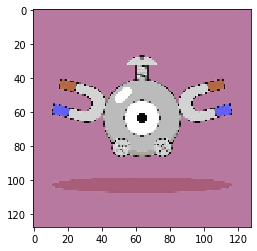

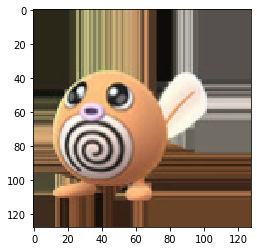

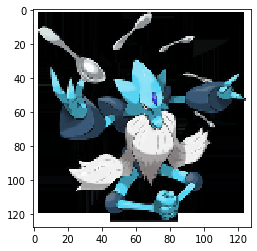

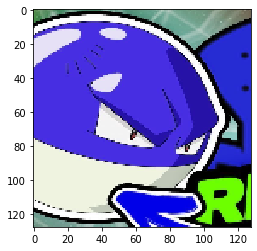

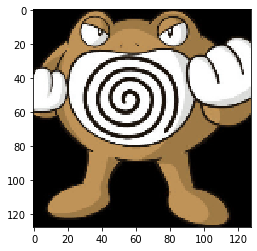

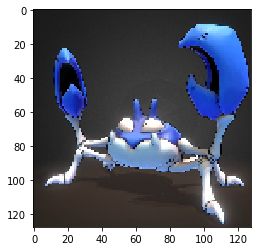

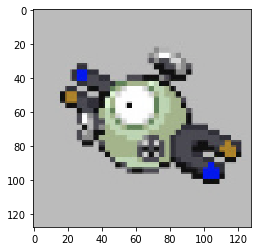

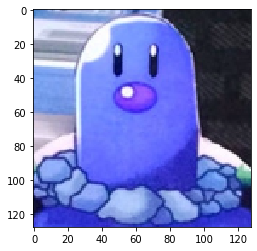

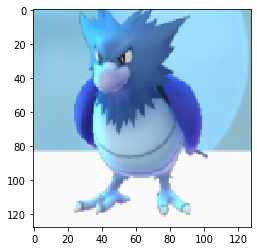

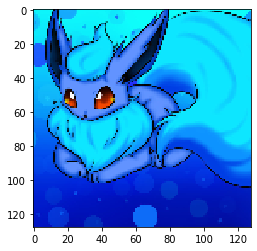

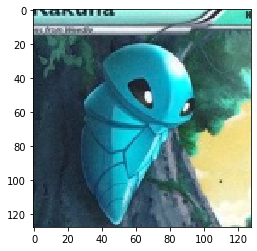

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [5]:
#debug stuff ignore it
for i in (testImagesX):
    plt.imshow(i)
    plt.show()

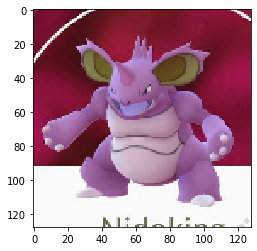

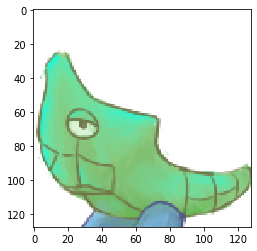

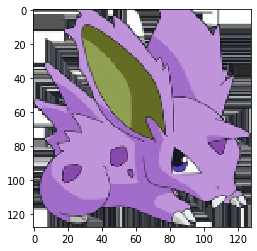

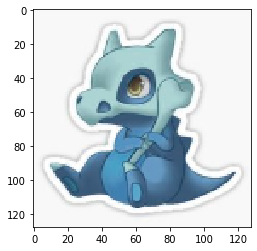

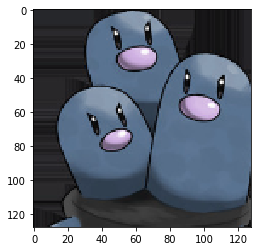

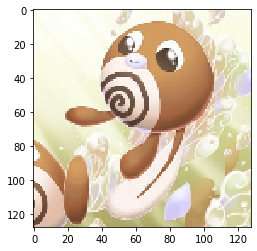

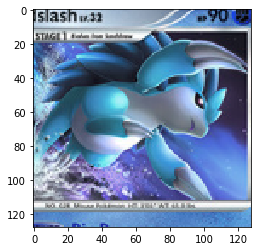

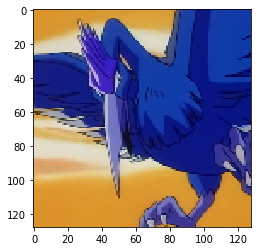

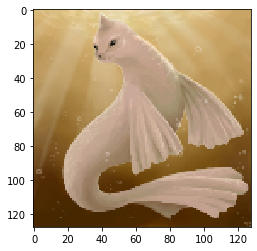

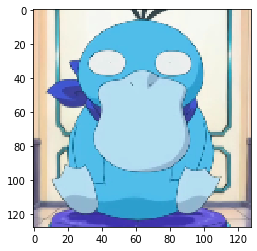

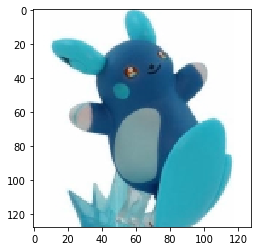

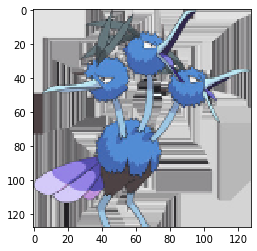

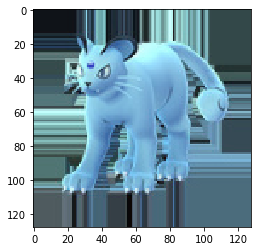

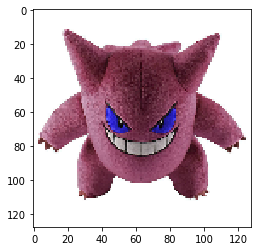

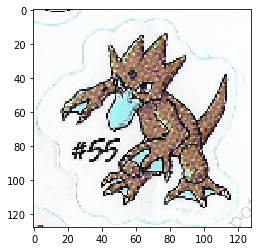

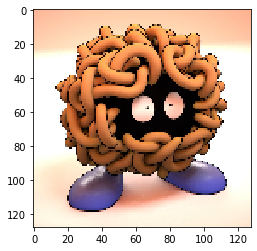

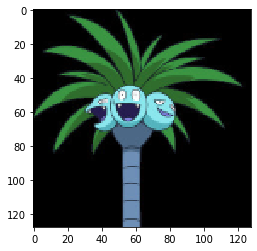

KeyboardInterrupt: 

In [6]:
#debug stuff ignore it
for i in (testAttrX):
    plt.imshow(i)
    plt.show()

In [7]:
hist = autoencoder.fit(trainImagesX,trainAttrX,validation_data = (testImagesX,testAttrX),epochs = 20 ,batch_size=20)

Train on 6143 samples, validate on 683 samples
Epoch 1/20
6143/6143 [==============================] - 16s 3ms/sample - loss: 0.1040 - val_loss: 0.0627
Epoch 2/20
6143/6143 [==============================] - 15s 2ms/sample - loss: 0.0538 - val_loss: 0.0495
Epoch 3/20
6143/6143 [==============================] - 13s 2ms/sample - loss: 0.0443 - val_loss: 0.0412
Epoch 4/20
6143/6143 [==============================] - 12s 2ms/sample - loss: 0.0393 - val_loss: 0.0383
Epoch 5/20
6143/6143 [==============================] - 12s 2ms/sample - loss: 0.0363 - val_loss: 0.0385
Epoch 6/20
6143/6143 [==============================] - 12s 2ms/sample - loss: 0.0343 - val_loss: 0.0345
Epoch 7/20
6143/6143 [==============================] - 12s 2ms/sample - loss: 0.0332 - val_loss: 0.0341
Epoch 8/20
6143/6143 [==============================] - 13s 2ms/sample - loss: 0.0319 - val_loss: 0.0329
Epoch 9/20
6143/6143 [==============================] - 13s 2ms/sample - loss: 0.0311 - val_loss: 0.0318
Epoch 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


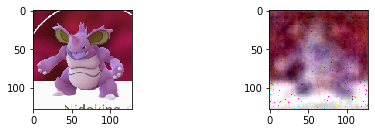

In [8]:
predictions = autoencoder.predict(testImagesX)
predictions = np.array(predictions[0]).reshape(
            (128, 128, 3))
plt.subplot(1,3,1)
plt.imshow(testImagesX[0])
plt.subplot(1,3,3)
plt.imshow(predictions)
plt.show()

In [9]:
autoencoder.save("autoencoder_network.h5")